Notebook responsável pelo ETL e análise dos dados dos 3o Trimestres de 2022 e 2024 da PNAD Contínua, com foco em analisar a queda da taxa de desocupação segmentando por marcadores sociais

# libs

In [7]:
!pip install pnadc # biblioteca para extrair dados da pnadc

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pnadc

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# funcoes

## faixa etaria

In [13]:
def faixa_etaria(df, coluna):
    """
    funcao para calcular a faixa etaria de uma coluna de idade
    """
    bins = [13, 17, 24, 39, 59, np.inf]

    rotulos = [
      '14 a 17 anos',
      '18 a 24 anos',
      '25 a 39 anos',
      '40 a 59 anos',
      '60 anos ou mais'
    ]

    df['faixa_etaria'] = pd.cut(
        df[coluna],
        bins=bins,
        labels=rotulos,
        right=True,
        include_lowest=True
    )

    return df

## grafico de barras

In [14]:
def grafico_vbar(
    agregacao,
    titulo,
    subtitulo,
    tamanho_grafico,
    coluna_x,
    coluna_y,
    coluna_hue,
    cor_rotulos='#555555',
    y_fonte = -0.15,
    y_titulo = 1.1
):

  lista_cores = ['#d2d2d2', '#1696d2']

  fig, ax = plt.subplots(figsize=tamanho_grafico)

  plot = sns.barplot(
      data = agregacao,
      x = coluna_x,
      y = coluna_y,
      palette = lista_cores,
      hue = coluna_hue,
      ax=ax
  )

  sns.despine(bottom = False, left = True)

  # elementos textuais
  plot.set_title(titulo, loc = 'left', color = '#333333', y = y_titulo, fontsize = 14)
  plt.text(
    0, 1.1,
    subtitulo,
    color = cor_rotulos,
    transform = ax.transAxes)

  plt.text(
      0,-0.35,
      'Fonte: PNAD Contínua - IBGE\nElaborado por: Fellipe Porto',
      color = cor_rotulos,
      transform = ax.transAxes
  )

  # elementos dos eixos
  plt.tick_params(axis = 'x', colors = cor_rotulos)
  plt.tick_params(axis = 'y', colors = cor_rotulos, length = 0)

  plot.set_xlabel('')
  plot.set_ylabel('')
  plot.set_yticklabels([])

  # ajustando legenda
  if coluna_hue:
      n_categorias = len(agregacao[coluna_hue].unique())
      ax.legend(
          frameon = False,
          loc = 'lower left',
          bbox_to_anchor = (0.2, 1.05),
          ncol = n_categorias,
          title = ''
      )

  # rotulos dos dados
  for bar in plot.patches:
          height = bar.get_height()

          if np.isnan(height) or height < 0.01:
              continue

          x_pos = bar.get_x() + bar.get_width() / 2

          offset = height * 0.01
          y_pos = height + offset

          ax.text(
          x = x_pos,
          y = y_pos,
          s = f'{height:,.2f}'.replace('.', ',') + '%',
          ha = 'center',
          va = 'bottom',
          color = cor_rotulos,
          fontsize = 10
          )

  return fig, ax

In [15]:
def grafico_hbar(
    agregacao,
    titulo,
    subtitulo,
    tamanho_grafico,
    coluna_x,
    coluna_y,
    coluna_hue,
    cor_rotulos='#555555',
    y_titulo = 1.1
):

  lista_cores = ['#d2d2d2', '#1696d2']

  fig, ax = plt.subplots(figsize=tamanho_grafico)


  plot = sns.barplot(
      data = agregacao,
      x = coluna_x,
      y = coluna_y,
      palette = lista_cores,
      hue = coluna_hue,
      ax=ax
  )


  sns.despine(bottom=True, left=False)

  # elementos textuais
  plot.set_title(titulo, loc = 'left', color = '#333333', y = y_titulo, fontsize = 14)
  plt.text(
    0, 1.1,
    subtitulo,
    color = cor_rotulos,
    transform = ax.transAxes)


  plt.text(
      0, -0.15,
      'Fonte: PNAD Contínua - IBGE\nElaborado por: Fellipe Porto',
      color = cor_rotulos,
      transform = ax.transAxes
  )

  # elementos dos eixos
  plt.tick_params(axis = 'x', colors = cor_rotulos, length = 0)
  plt.tick_params(axis = 'y', colors = cor_rotulos)

  plot.set_xlabel('')
  plot.set_ylabel('')
  plot.set_xticklabels([])

  # ajuste legenda
  if coluna_hue:
      n_categorias = len(agregacao[coluna_hue].unique())
      ax.legend(
          frameon = False,
          loc = 'lower left',
          bbox_to_anchor = (0.2, 1.05),
          ncol = n_categorias,
          title = ''
      )


  # rotulos dos dados
  for bar in plot.patches:
          width = bar.get_width()

          if np.isnan(width) or width < 0.01:
              continue

          x_pos = width * 0.01
          y_pos = bar.get_y() + bar.get_height() / 2

          ax.text(
          x = width + x_pos,
          y = y_pos,
          s = f'{width:,.2f}%',
          ha = 'left',
          va = 'center',
          color = cor_rotulos,
          fontsize = 10
          )

  return fig, ax

# diretorio

In [16]:
# diretorio para salvar graficos

path = '/content/drive/My Drive/projeto_ipea_pnadc/graficos/'

# importando dados

In [17]:
# definindo variaveis de interesse

vars = [
    'Ano',
    'Trimestre',
    'UF',
    'V1028', # peso individual amostral
    'V2007', # genero
    'V2010', # raca
    'V2009', # idade
    'VD4020', # renda mensal
    'VD4002', # condicao de ocupacao
    'VD4001' # condicao em relacao a forca de trabalho
]

In [18]:
# importando dados do 3o trimestre de 2022

pnadc_3t22 = pnadc.get(
    quarter = 3,
    year = 2022,
    keep_columns = vars
)

Chaves_PNADC.pdf download is complete!
Definicao_variaveis_derivadas_PNADC_20200211.pdf download is complete!
Deflatores.zip download is complete!
Unziping Deflatores.zip
Unzip complete
Dicionario_e_input_20221031.zip download is complete!
Unziping Dicionario_e_input_20221031.zip
Unzip complete
Estrutura_Atividade_CNAE_Domiciliar_2_0.xls download is complete!
Estrutura_Ocupacao_COD.xls download is complete!
Grupamentos_ocupacionais_atividades_PNADC.pdf download is complete!
PNADcIBGE_Deflator_Trimestral.pdf download is complete!
Variaveis_PNADC_Trimestral.xls download is complete!
PNADC_032022_20250815.zip download is complete!
Unziping PNADC_032022_20250815.zip
Unzip complete
Building PNADC_032022.txt
Multiprocessing chunks


100%|██████████| 25/25 [04:33<00:00, 10.93s/it]

Done!


In [19]:
# importando dados 3o trimestre 2024

pnadc_3t24 = pnadc.get(
    quarter = 3,
    year = 2024,
    keep_columns = vars
)

Chaves_PNADC.pdf download is complete!
Definicao_variaveis_derivadas_PNADC_20200211.pdf download is complete!
Deflatores.zip download is complete!
Unziping Deflatores.zip
Unzip complete
Dicionario_e_input_20221031.zip download is complete!
Unziping Dicionario_e_input_20221031.zip
Unzip complete
Estrutura_Atividade_CNAE_Domiciliar_2_0.xls download is complete!
Estrutura_Ocupacao_COD.xls download is complete!
Grupamentos_ocupacionais_atividades_PNADC.pdf download is complete!
PNADcIBGE_Deflator_Trimestral.pdf download is complete!
Variaveis_PNADC_Trimestral.xls download is complete!
PNADC_032024_20250815.zip download is complete!
Unziping PNADC_032024_20250815.zip
Unzip complete
Building PNADC_032024.txt
Multiprocessing chunks


100%|██████████| 24/24 [03:56<00:00,  9.84s/it]

Done!


## tratamento dos dados

In [20]:
# definindo uma lista das bases de cada trim. para facilitar nas operacoes de tratamento dos dados

lista_df = [pnadc_3t22, pnadc_3t24]

### colunas

In [22]:
# renomeando as colunas

mapa_colunas = {
    'V2007': 'sexo',
    'V2010': 'raca',
    'V2009': 'idade',
    'VD4020': 'renda_mensal',
    'VD4002': 'ocupacao',
    'VD4001': 'forca_trabalho',
    'V1028': 'peso_amostral'
}

for df in lista_df:
    df.rename(columns = mapa_colunas, inplace = True)
    df.columns = df.columns.str.lower()
    print(df.columns)


Index(['ano', 'trimestre', 'uf', 'peso_amostral', 'sexo', 'raca', 'idade',
       'renda_mensal', 'ocupacao', 'forca_trabalho'],
      dtype='object')
Index(['ano', 'trimestre', 'uf', 'peso_amostral', 'sexo', 'raca', 'idade',
       'renda_mensal', 'ocupacao', 'forca_trabalho'],
      dtype='object')


In [23]:
# tornando colunas numericos para tipo int
col_int = ['ano', 'trimestre']

for df in lista_df:
    for col in col_int:
        df[col] = df[col].astype(int)


### dicionario de valores  

In [25]:
mapa_sexo = {
    1: 'Homem',
    2: 'Mulher'
}


In [26]:
mapa_raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Sem declaração/Não Aplicável'
}

In [27]:
mapa_ocupacao = {
    1: 'Pessoa Ocupada',
    2: 'Pessoa Desocupada',
    3: 'Pessoa Fora da Força de Trabalho'
}

In [28]:
mapa_forca_trabalho = {
    1: 'Na força de trabalho',
    2: 'Fora da força de trabalho',
    3: 'Não se aplica'
}

### transformando valores

In [29]:
# dicionario geral com todos os de-para de transformacao das colunas
dicionario_mapas = {
    'uf': mapa_uf,
    'sexo': mapa_sexo,
    'raca': mapa_raca,
    'forca_trabalho': mapa_forca_trabalho,
    'ocupacao': mapa_ocupacao
}


In [30]:
# for que itera em cada base, para cada coluna em que foi mapeado uma transformacao do valor

for df in lista_df:
    for coluna, mapa in dicionario_mapas.items():
      df[coluna] = df[coluna].replace(dicionario_mapas[coluna])

      print(f"[{coluna}]: {df[coluna].unique()}")

[uf]: ['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']
[sexo]: ['Mulher' 'Homem']
[raca]: ['Parda' 'Preta' 'Branca' 'Indígena' 'Amarela'
 'Sem declaração/Não Aplicável']
[forca_trabalho]: ['Na força de trabalho' 'Fora da força de trabalho' nan]
[ocupacao]: ['Pessoa Ocupada' nan 'Pessoa Desocupada']
[uf]: ['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']
[sexo]: ['Mulher' 'Homem']
[raca]: ['Branca' 'Parda' 'Preta' 'Amarela' 'Indígena'
 'Sem declaração/Não Aplicável']
[forca_trabalho]: ['Fora da força de trabalho' 'Na força de trabalho' nan]
[ocupacao]: [nan 'Pessoa Ocupada' 'Pessoa Desocupada']


### faixa etaria

validando se há alguma imputação a ser feita nos dados da idade e aplicando função da faixa etaria.

apesar de ter idades máximas muito altas, não farei nenhum tipo de tranformação, visto que isso não irá impactar na análise

In [31]:
# for df in lista_df:
#     print(df['idade'].describe())
#     sns.histplot(df, x = 'idade', kde = True)
#     plt.show()

In [32]:
for df in lista_df:
    df = faixa_etaria(df, 'idade')
    print(df.columns)

Index(['ano', 'trimestre', 'uf', 'peso_amostral', 'sexo', 'raca', 'idade',
       'renda_mensal', 'ocupacao', 'forca_trabalho', 'faixa_etaria'],
      dtype='object')
Index(['ano', 'trimestre', 'uf', 'peso_amostral', 'sexo', 'raca', 'idade',
       'renda_mensal', 'ocupacao', 'forca_trabalho', 'faixa_etaria'],
      dtype='object')


# explorando dados


- taxa ocupação força de trabalho
- quais variáveis apresentaram maior mudança de um quarter para outro


In [34]:
def taxa_desocupacao(df):
  """
  funcao para calcular a taxa de desocupacao
  """
  df_filtrado = df[df['idade'] >= 14].copy()

  # definindo forca de trabalho -> soma de pessoas ocupadas e desocupadas
  ft_ponderada = df_filtrado.loc[
      df_filtrado['ocupacao'].isin(['Pessoa Ocupada', 'Pessoa Desocupada']),
      'peso_amostral'
  ].sum()


  # definindo pessoas desocupadas
  desocupados_ponderado = df_filtrado.loc[
      df_filtrado['ocupacao'] == 'Pessoa Desocupada',
      'peso_amostral'
  ].sum()

  taxa_desocupacao = ((desocupados_ponderado / ft_ponderada) * 100).round(2)


  return taxa_desocupacao

In [35]:
taxa_desocupacao_3q22 = taxa_desocupacao(pnadc_3t22)
taxa_desocupacao_3q24 = taxa_desocupacao(pnadc_3t24)

print(f'TD em 3T/22: {taxa_desocupacao_3q22}')
print(f'TD em 3T/24: {taxa_desocupacao_3q24}')

queda_pp_td = taxa_desocupacao_3q22 - taxa_desocupacao_3q24

print('\n')
print(f'Diferença em p.p.: {queda_pp_td}')

TD em 3T/22: 8.69
TD em 3T/24: 6.35


Diferença em p.p: 2.34


# indicadores

In [36]:
resultados_comparativos = []

colunas_indicadores = [
    'sexo',
    'raca',
    'faixa_etaria',
    'uf'
]

for df_ano in lista_df:

    # populacao em idade de trabalhar
    df_pit = df_ano[df_ano['idade'] >= 14].copy()

    # ano de referencia da agregacao
    ano_referencia = df_pit['ano'].iloc[0]

    # iterando sobre as variaveis de interesse
    for coluna in colunas_indicadores:

        # agrupando pela variavel
        resultado_td = (
            df_pit.groupby(coluna)
            .apply(taxa_desocupacao)
            .reset_index(name='taxa_desocupacao')
        )

        # identificando variavel e ano
        resultado_td.rename(columns={coluna: 'categoria'}, inplace=True)
        resultado_td['variavel'] = coluna
        resultado_td['ano'] = '3T/' + ano_referencia.astype(str)

        # salvando os resultados em uma lista
        resultados_comparativos.append(resultado_td)


# concatenando resultados da lista
df_indicadores = pd.concat(resultados_comparativos, ignore_index=True)

# passando uma ordem para as colunas do df
df_indicadores = df_indicadores[['categoria', 'variavel', 'taxa_desocupacao', 'ano']]

/tmp/ipython-input-746753977.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(taxa_desocupacao)
/tmp/ipython-input-746753977.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(taxa_desocupacao)
/tmp/ipython-input-746753977.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

# visualização dos dados

## indicador de sexo

In [37]:
indicador_sexo = df_indicadores[df_indicadores['variavel'] == 'sexo']
indicador_sexo

,categoria,variavel,taxa_desocupacao,ano
0,Homem,sexo,6.91,3T/2022
1,Mulher,sexo,10.94,3T/2022
18,Homem,sexo,5.32,3T/2024
19,Mulher,sexo,7.67,3T/2024


In [38]:
indicador_sexo_pivot = indicador_sexo.pivot(index = 'categoria', columns = 'ano', values = 'taxa_desocupacao').reset_index()

indicador_sexo_pivot['dif_pp'] = indicador_sexo_pivot['3T/2022'] - indicador_sexo_pivot['3T/2024']
indicador_sexo_pivot

ano,categoria,3T/2022,3T/2024,dif_pp
0,Homem,6.91,5.32,1.59
1,Mulher,10.94,7.67,3.27


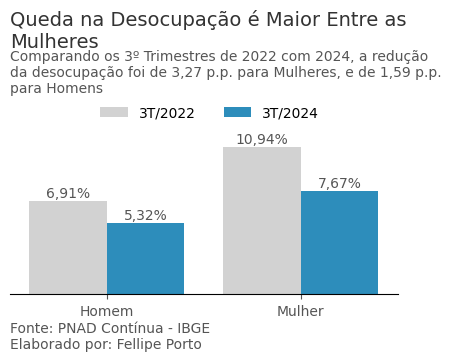

In [53]:
grafico_vbar(
    indicador_sexo,
    titulo = 'Queda na Desocupação é Maior Entre as\nMulheres',
    subtitulo='Comparando os 3º Trimestres de 2022 com 2024, a redução\nda desocupação foi de 3,27 p.p. para Mulheres, e de 1,59 p.p.\npara Homens\n\n',
    tamanho_grafico = (5, 2),
    coluna_x = 'categoria',
    coluna_y = 'taxa_desocupacao',
    coluna_hue = 'ano',
    y_titulo=1.55
)

plt.savefig(
    f'{path}td_sexo.png',
    bbox_inches = 'tight',
    dpi = 1500
)


## indicador de raca

In [40]:
indicador_raca = df_indicadores[df_indicadores['variavel'] == 'raca']

In [41]:
indicador_raca_pivot = indicador_raca.pivot(index = 'categoria', columns = 'ano', values = 'taxa_desocupacao').reset_index()

indicador_raca_pivot['dif_pp'] = indicador_raca_pivot['3T/2022'] - indicador_raca_pivot['3T/2024']
indicador_raca_pivot = indicador_raca_pivot.sort_values('dif_pp', ascending = False)
indicador_raca_pivot

ano,categoria,3T/2022,3T/2024,dif_pp
4,Preta,11.11,7.55,3.56
3,Parda,9.97,7.33,2.64
2,Indígena,9.88,7.84,2.04
1,Branca,6.80,5.01,1.79
0,Amarela,6.70,5.12,1.58
5,Sem declaração/Não Aplicável,7.27,7.03,0.24


In [42]:
# media da diferenca para raca

indicador_raca_pivot['dif_pp'].mean()

np.float64(1.9750000000000003)

In [43]:
# ordenando o indicador de raca pelo maior queda

ordem = indicador_raca_pivot['categoria'].unique()

indicador_raca['categoria'] = pd.Categorical(indicador_raca['categoria'], categories = ordem, ordered = True)

indicador_raca = indicador_raca.sort_values('categoria', ascending = False)

/tmp/ipython-input-2397694835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicador_raca['categoria'] = pd.Categorical(indicador_raca['categoria'], categories = ordem, ordered = True)


In [44]:
indicador_raca['categoria'] = (
    indicador_raca['categoria']
    .replace('Sem declaração/Não Aplicável', 'Sem declaração')
)

/tmp/ipython-input-1683240857.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace('Sem declaração/Não Aplicável', 'Sem declaração')


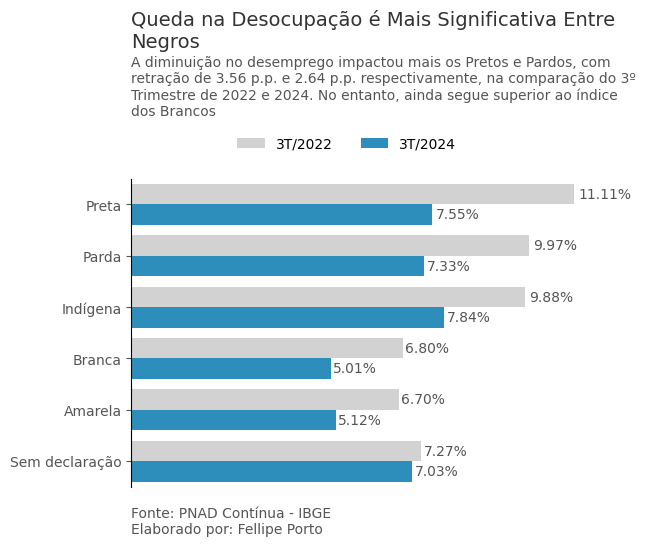

In [54]:


grafico_hbar(
    indicador_raca,
    titulo = 'Queda na Desocupação é Mais Significativa Entre\nNegros',
    subtitulo='A diminuição no desemprego impactou mais os Pretos e Pardos, com\nretração de 3.56 p.p. e 2.64 p.p. respectivamente, na comparação do 3º\nTrimestre de 2022 e 2024. No entanto, ainda segue superior ao índice\ndos Brancos\n\n',
    tamanho_grafico = (6, 4),
    coluna_x = 'taxa_desocupacao',
    coluna_y = 'categoria',
    coluna_hue = 'ano',
    y_titulo=1.4
)

plt.savefig(
    f'{path}td_raca.png',
    bbox_inches = 'tight',
    dpi = 1500
)

## renda média

In [47]:
def renda_media(df):
  # definindo filtros para populacao ocupada
  mask_ocupados = (
      (df['idade'] >= 14) &
      (df['ocupacao'] == 'Pessoa Ocupada') &
      (df['renda_mensal'] > 0)
  )
  df_filtrado = df[mask_ocupados]

  df_filtrado['renda_ponderada'] = df_filtrado['renda_mensal'] * df_filtrado['peso_amostral']

  renda_total_ponderada = df_filtrado['renda_ponderada'].sum()
  peso_ocupados_ponderados = df_filtrado['peso_amostral'].sum()

  renda_media = (renda_total_ponderada / peso_ocupados_ponderados).round(2)

  return renda_media

In [48]:
renda_media_sexo = pnadc_3t22.groupby('sexo').apply(renda_media) #.reset_index(name = 'renda_media')
renda_media_raca = pnadc_3t22.groupby('raca').apply(renda_media) #.reset_index(name = 'renda_media')

print(f'Renda Média por Sexo, 3t/2022: \n{renda_media_sexo}\n')
print(f'Renda Média por Raça, 3t/2022: \n{renda_media_raca}\n')

Renda Média por Sexo, 3t/2022: 
sexo
Homem     3090.91
Mulher    2442.03
dtype: float64

Renda Média por Raça, 3t/2022: 
raca
Amarela                         4419.44
Branca                          3576.57
Indígena                        2593.91
Parda                           2161.95
Preta                           2130.13
Sem declaração/Não Aplicável    4826.43
dtype: float64



/tmp/ipython-input-3615834246.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  renda_media_sexo = pnadc_3t22.groupby('sexo').apply(renda_media) #.reset_index(name = 'renda_media')
/tmp/ipython-input-3615834246.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  renda_media_raca = pnadc_3t22.groupby('raca').apply(renda_media) #.reset_index(name = 'renda_media')


In [49]:
renda_media_sexo = pnadc_3t24.groupby('sexo').apply(renda_media) #.reset_index(name = 'renda_media')
renda_media_raca = pnadc_3t24.groupby('raca').apply(renda_media) #.reset_index(name = 'renda_media')

print(f'Renda Média por Sexo, 3t/2024: \n{renda_media_sexo}\n')
print(f'Renda Média por Raça, 3t/2024: \n{renda_media_raca}\n')

/tmp/ipython-input-157032146.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  renda_media_sexo = pnadc_3t24.groupby('sexo').apply(renda_media) #.reset_index(name = 'renda_media')
/tmp/ipython-input-157032146.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  renda_media_raca = pnadc_3t24.groupby('raca').apply(renda_media) #.reset_index(name = 'renda_media')


Renda Média por Sexo, 3t/2024: 
sexo
Homem     3661.96
Mulher    2852.73
dtype: float64

Renda Média por Raça, 3t/2024: 
raca
Amarela                         5090.57
Branca                          4245.20
Indígena                        2558.62
Parda                           2572.91
Preta                           2525.11
Sem declaração/Não Aplicável    4776.67
dtype: float64



calculando diferenças entre cada categoria de interesse

In [50]:
dif_renda_media_sexo = renda_media_sexo[0] - renda_media_sexo[1]
dif_renda_media_sexo

/tmp/ipython-input-2320330096.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dif_renda_media_sexo = renda_media_sexo[0] - renda_media_sexo[1]


np.float64(809.23)

In [51]:
# brancos - pretos
dif_renda_media_pretos = renda_media_raca[1] - renda_media_raca[4]
dif_renda_media_pretos

/tmp/ipython-input-3825723910.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dif_renda_media_pretos = renda_media_raca[1] - renda_media_raca[4]


np.float64(1720.0899999999997)

In [52]:
# brancos - pardos
dif_renda_media_pardos = renda_media_raca[1] - renda_media_raca[3]
dif_renda_media_pardos

/tmp/ipython-input-311649164.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dif_renda_media_pardos = renda_media_raca[1] - renda_media_raca[3]


np.float64(1672.29)